파이썬 머신러닝 완벽가이드 ch6. 3 pg. 393 ~ 395

---

## 03 LDA(Linear Discriminant Analysis)

### LDA 개요

- 선형 판별 분석법
- PCA와 유사 : 저차원 공간에 투영해 차원 축소
- 차이 : LDA는 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하며 차원 축소
>- PCA : 데이터 변동성이 가장 큰 축을 찾는다.
>- LDA : 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾는다.

LDA는 특정 공간상에서 클래스 분리를 최대화 하는 축을 찾기 위해 클래스 간 분산과 클래스 내부 분산의 비율을 최대화하는 방식으로 차원 축소
- 클래스 간 분산은 최대 가져가고, 클래스 내부의 분산은 최대한 작게 가져간다.



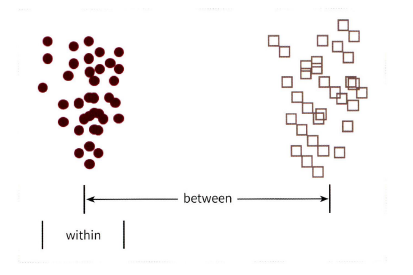

- 클래스 간 분산이 크고, 클래스 분산이 작은 그림

LDA를 구하는 스텝
1. 클래스 내부와 클래스 간 분산 행렬을 구한다.
- 이 두 개의 행렬은 입력 데이터의 결정 값 클래스별로 개별 피처의 평균 벡터를 기반으로 구한다.
2. 클래스 내부 분산 행렬을 Sw, 클래스 간 분산 행렬을 Sb라고 하면 다음 식으로 두 행렬을 고유벡터로 분해
3. 고유값이 가장 큰 순으로 K개(LDA변환 차수만큼) 추출
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터 변환

#### 붓꽃 데이터 세트에 LDA 적용

In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [5]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


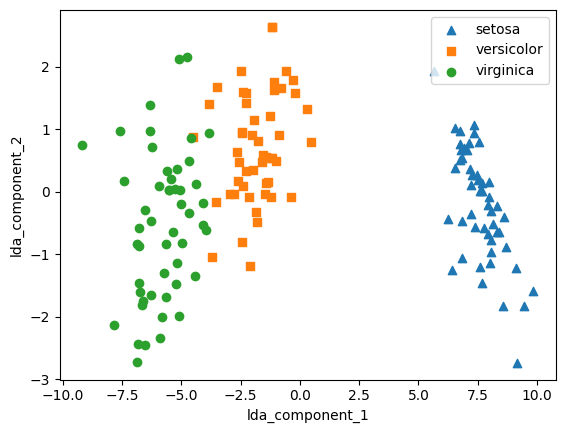

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns = ['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target'] = iris.target

# setosa는 세모, vericolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']

# setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target별로 다른 모양으로 산점도 표시
for i, marker in enumerate(markers):
  x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
  y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()